#  Assignment 5: Reproducability

## Notebook made by  

|** Name** | **Student id** | **email**|
|:- |:-|:-|
|. | | |
|  | |. |

### Pledge (taken from [Coursera's Honor Code](https://www.coursera.org/about/terms/honorcode) )



Put here a selfie with your photo where you hold a signed paper with the following text: (if this is team work, put two selfies here). The link must be to some place on the web, not to a local file. 

> My answers to homework, quizzes and exams will be my own work (except for assignments that explicitly permit collaboration).

>I will not make solutions to homework, quizzes or exams available to anyone else. This includes both solutions written by me, as well as any official solutions provided by the course staff.

>I will not engage in any other activities that will dishonestly improve my results or dishonestly improve/hurt the results of others.

<img src='link to your selfie'/>

### Note
* **Assignments without the selfies or completely filled in information will not be graded and receive 0 points.**


  We bekijken   het artikel <http://language.media.mit.edu/paper> en zien in hoeverre we uit de ruwe data dezelfde gegevens kunnen halen als de auteurs van het artikel. Eerst maken  we de netwerkdata gebaseerd op boekvertalingen.

Daarna  gaan we de netwerkdata gebaseerd op de wikipedia data maken. De ruwe wikipedia "tsv" (voor tab separated) lijkt wel een spreadsheet, maar is in een onhandig formaat omdat de regels geen vast aantal kolommen hebben. We zullen dat eerst handmatig moeten oplossen. 

 

In [126]:
%matplotlib inline
import pandas as pd
import re
from lxml import etree 
from bz2file import BZ2File
import codecs
import nltk
from collections import defaultdict
from  itertools import combinations  # ideal for creating all possible pairs that one can make out of a set
from __future__ import division
from math import sqrt 
import itertools
import numpy as np

# Deel boekvertalingen

# 1

Read the spreadsheet on `http://language.media.mit.edu/data/public/unesco_langlang_20120722_iso639-3.txt` directly in in pandas in a dataframe called `raw`, and show the first 5 lines of the dataframe `raw`.

* this must be done in 2 lines

In [127]:
raw = pd.read_csv('http://language.media.mit.edu/data/public/unesco_langlang_20120722_iso639-3.txt',delimiter="\t")
raw[:5]

,original_language,target_language,num_translations
0,abk,aze,1
1,abk,bul,1
2,abk,deu,1
3,abk,eng,2
4,abk,est,2


# 2 
We zijn natuurlijk in de Nederlandse taal geinterreseerd. Die heeft code `nld`.

1. Hoeveel regels zijn er in `raw` met `nld` in de kolom `original_language`
2. En hoeveel in de kolom `target_language`
3. Naar welke taal zijn er de meeste vertalingen vanuit het Nederlands?  Geef een one liner die de top 5 laat zien. Je laat alleen de kolommen `['target_language','num_translations']` zien, en eventueel de index kolom.
4. Maak een plotje met op de x-as de namen van talen omgekeerd geordend op het aantal vertalingen, en op de y-as hoe veel vertalingen er vanuit het Nederlands naar die taal is. Zorg dat de y-as in een log schaal geplot wordt.  
    * Je krijgt een wiebelige bijna rechte dalende curve. De x-as  begint met `deu`.

### 2.1 Hoeveel regels zijn er in `raw` met `nld` in de kolom `original_language`

In [128]:

raw['original_language'].loc[raw['original_language'] == 'nld'].count()

68

### 2.2 En hoeveel in de kolom `target_language`

In [129]:

raw['target_language'].loc[raw['target_language'] == 'nld'].count()

116

### 2.3 Naar welke taal zijn er de meeste vertalingen vanuit het Nederlands?  Geef een one liner die de top 5 laat zien. Je laat alleen de kolommen `['target_language','num_translations']` zien, en eventueel de index kolom.

In [130]:
raw1 = raw[['target_language','num_translations']].sort_values(by='num_translations',ascending=False).head(5)
raw1

,target_language,num_translations
1465,deu,183329
1484,fra,149788
1670,spa,128205
1534,jpn,100739
1615,nld,73423


### 2.4 Maak een plotje met op de x-as de namen van talen omgekeerd geordend op het aantal vertalingen, en op de y-as hoe veel vertalingen er vanuit het Nederlands naar die taal is. Zorg dat de y-as in een log schaal geplot wordt.   Je krijgt een wiebelige bijna rechte dalende curve. De x-as  begint met `deu`.

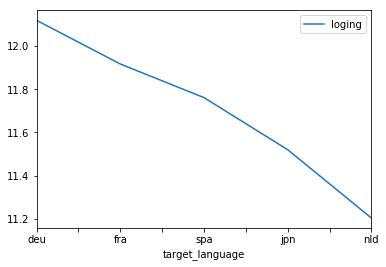

In [131]:
raw1['loging'] = np.log(raw1.num_translations)

raw1.plot(x='target_language',y='loging')


# 3 

Bekijk eens de output van `spannend= raw.original_language.value_counts()`. Gebruik `?` om uit te vogelen wat `value_counts` eigenlijk doet.

1. Beschrijf, gebruikmakend van terminologie uit de theorie van sociale netwerken, wat `spannend` betekent.
2. Wat betekent `raw.target_language.value_counts()` dan?
3. Maak een pandas Series object genaamd `total_translations` (een Dataframe met maar 1 kolom) met de taalcode als index en met voor elke taal het totaal aantal vertalingen vanuit die taal als waarde. Sorteer weer omgekeerd. De top 5 ziet er dan als volgt uit:
```
eng    1225237
fra     216624
deu     201718
rus     101395
ita      66453
```
    1. Plot `total_translations` in loglog schaal. 
    2. Wat is de waarde in `total_translations` voor het Nederlands?

In [132]:
spannend= raw.original_language.value_counts()


### 3.1Beschrijf, gebruikmakend van terminologie uit de theorie van sociale netwerken, wat `spannend` betekent.

Spannend is het aantal keer dat een land voorkomt in de column originele waarde, dus hoe vaak een taal naar een unieke andere taal wordt vertaald.

### 3.2 Wat betekent `raw.target_language.value_counts()` dan?

 raw.target_language.value_counts() is het aantal keer dat een land voorkomt in de column target language. Dus hoe vaak een land een vertaling krijgt uit een ander uniek land.

### 3.3  Maak een pandas Series object genaamd `total_translations` (een Dataframe met maar 1 kolom) met de taalcode als index en met voor elke taal het totaal aantal vertalingen vanuit die taal als waarde. Sorteer weer omgekeerd. De top 5 ziet er dan als volgt uit:

In [133]:
raw2= raw.groupby(['original_language']).sum()
total_translations= raw2.sort_values(by='num_translations',ascending=False)

total_translations.head(5)


,num_translations
original_language,
eng,1225237
fra,216624
deu,201718
rus,101395
ita,66453


C:\Users\joeps\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


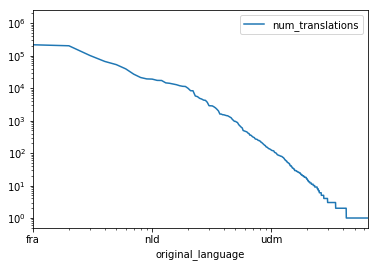

In [134]:
total_translations.plot(loglog=True)


# 4

1. Geef de mediaan en het gemiddelde van het aantal vertalingen.
2. Hoeveel taal-paren hebben meer vertalingen dan de mediaan?

### 4.1 Geef de mediaan en het gemiddelde van het aantal vertalingen.

In [135]:
print('De mediaan is:',raw['num_translations'].median(),'Het gemiddelde is:',raw['num_translations'].mean())


De mediaan is: 3.0 Het gemiddelde is: 323.1856356791196


### 4.2 Hoeveel taal-paren hebben meer vertalingen dan de mediaan?

In [136]:
taal_paren = raw[raw['num_translations'] > raw['num_translations'].median()]
print('Zoveel taal-paren hebben meer vertalingen dan de mediaan:', taal_paren['num_translations'].count())

Zoveel taal-paren hebben meer vertalingen dan de mediaan: 3289


# Deel  Wikipedia  

 

1. Maak   van de Wikipedia _raw_ dataset de netwerk  datasets die op <http://language.media.mit.edu/data> beschreven staan. 
2. We bekijken in hoeverre onze resultaten afwijken van die in de geleverde bewerkte datasets.
3. We leggen eventuele verschillen uit.

#### In Stapjes

We doen de opdracht in een aantal stapjes.

#### Let op, je notebook moet vanzelf draaien. Alle data moet opgehaald worden.

# Download 

1. Download de ruwe dataset als zip file, ontzip hem en sla hem in de directory op waarin dit notebook ook staat.
    * Dit mag je met de hand doen. De code **moet niet runbaar** in je notebook staan.
    * Maar zorg dat de rest van de code er vanuit gaat dat `wikipedia_userlang_iso639-3.tsv` in dezelfde folder staat als dit notebook
2. Lees de 2 bewerkte datasets over Wikipedia _Wikipedia Stats by Language_ en _Edges_ direct in van de urls in  pandas Dataframes, die je respectivelijk `dataset_stats_wikipedia` en `wikipedia_edges` noemt.
    1. Maak de Taal code de index in het eerste frame, en hou alleen de Kolommen `['Editors', 'Edits','Multilinguals','Edits by mulitlinguals']`
    2. Sorteer het frame op de index
    2. Verwijder de kolommen `SourceLanguageName	TargetLanguageName	SourcePopulation	TargetPopulations` uit het tweede frame
    3. Sorteer het frame op `SourceLanguageName`
    3. Laat steeds met `head()` zien dat het werkt.
    
### Je antwoord bestaat uit 2 cellen

In [22]:
# jouw code hier 
dataset_stats_wikipedia = pd.read_csv('http://language.media.mit.edu/data/public/dataset_stats_wikipedia.tsv',delimiter='\t',encoding='utf-8',index_col='Code')
dataset_stats_wikipedia = dataset_stats_wikipedia[['Editors', 'Edits','Multilinguals','Edits by mulitlinguals']]
dataset_stats_wikipedia.sort_index()
dataset_stats_wikipedia.head()
#dataset_stats_wikipedia.get_value("Italian",'Edits')

,Editors,Edits,Multilinguals,Edits by mulitlinguals
Code,,,,
abk,15,2807,7,1494
aar,4,46,3,9
afr,511,103652,352,95988
aka,31,327,24,240
sqi,1996,196685,1083,137800


In [3]:
# jouw code hier  (verwijderen van de kolommen)
wikipedia_edges = pd.read_csv('http://language.media.mit.edu/data/public/wikipedia_edges.tsv',delimiter='\t',encoding='latin-1')
wikipedia_edges = wikipedia_edges.drop(['SourceLanguageName', 'TargetLanguageName', 'SourcePopulation', 'TargetPopulations'], axis=1)
wikipedia_edges.head()

,SourceLanguageCode,TargetLanguageCode,Coocurrences,PhiCorrelation,Tstatistic
0,afr,eng,271,0.013648,17.207148
1,afr,nld,78,0.015377,3.332197
2,amh,eng,28,0.004344,5.476711
3,ang,eng,51,0.006363,8.021067
4,ara,deu,446,0.007497,3.550224


In [4]:
# jouw code hier  (sorten op SourceLanguageName)
wikipedia_edges = pd.read_csv('http://language.media.mit.edu/data/public/wikipedia_edges.tsv',delimiter='\t',encoding='latin-1')
wikipedia_edges.sort_values(by=['SourceLanguageName'])
wikipedia_edges.head()

,SourceLanguageCode,TargetLanguageCode,SourceLanguageName,TargetLanguageName,SourcePopulation,TargetPopulations,Coocurrences,PhiCorrelation,Tstatistic
0,afr,eng,Afrikaans,English,776,273987,271,0.013648,17.207148
1,afr,nld,Afrikaans,Dutch,776,26888,78,0.015377,3.332197
2,amh,eng,Amharic,English,81,273987,28,0.004344,5.476711
3,ang,eng,Old English (ca. 450-1100),English,135,273987,51,0.006363,8.021067
4,ara,deu,Arabic,German,6361,103768,446,0.007497,3.550224


# Haal gegevens uit de ruwe data, deel 1

* De file `'wikipedia_userlang_iso639-3.tsv'` lijkt een spreadsheet maar hij heeft niet op elke regel evenveel kolommen.
* Processing met pandas is dus ook lastig.
* Als alternatief gaan we file zelf regel voor regel  inlezen, en de gewenste gegevens opslaan.
* Ons einddoel is om een dataframe te maken dat er precies zo uitziet als `dataset_stats_wikipedia`
* We doen dat in 2 stappen:
    1. We maken een aantal dicts aan met de gewenste gegevens
    2. Van elke dict maken we een dataframe met `pd.DataFrame.from_dict`
    3. Die plakken we allemaal aan elkaar met `join` (neem een inner join)
    4. Noem het eindresultaat `stats`, sorteer het ook op de index en laat het begin zien met `head`.
    5. Check natuurlijk zelf of je op de goede weg zit door je resultaat te vergelijken met `dataset_stats_wikipedia`
* Hieronder staat wat code om je op weg te helpen
* **Lees het artikel en de supplementary material goed om net als zij de ruwe data te filteren.**


# Haal gegevens uit de ruwe data, deel 2

* In dezelfde code waarin je de vorige vraag hebt gemaakt, maak je ook een dict `pairs` aan. Hier zijn de sleutels paren van taalcodes, **waarbij de eerste altijd alfabetisch eerder is dan de tweede**, en hun waarde het aantal cooccurences.
* Maak van dit dict een Dataframe `edges`, waarbij `edges.columns=['SourceLanguageCode','TargetLanguageCode','Coocurrencesmy']`
* Sorteer ook hier op `'SourceLanguageCode'`
* **Lees het artikel en de supplementary material goed om net als zij de ruwe data te filteren.**

In [106]:
%%time
from collections import defaultdict
items = []
# Your code 
with open('../wikipedia_userlang_iso639-3.tsv', encoding = 'latin-1') as f:
    c=0
    editors=defaultdict(int)
    edits=defaultdict(int)
    multilingual=defaultdict(int)
    Edits_by_mulitlinguals=defaultdict(int)
    pairs= defaultdict(int)
    source = {}
    target = {}
    c=0
    for l in f:
        # your code
        temp = [x.replace("\n", "") for x in l.split("\t")[1:]]
        if len(temp) < 6:
            temp2 = [(x.split(',')[0],int(x.split(',')[1])) for x in temp]
            temp2 = [x for x in temp2 if x[1] > 1]
            if temp2:
                items.append(temp2)
        c+=1
        pairstemp= []
    
        for langs in temp2:
            
            editors[langs[0]] += 1
            edits[langs[0]] += langs[1]
            if len(temp2) > 1:
                multilingual[langs[0]] += 1
                Edits_by_mulitlinguals[langs[0]] += langs[1]
                pairstemp.append(langs[0])
                    
        if pairstemp:
            testje = list(itertools.permutations(pairstemp, 2)) 
            
            for thing in testje:
                pairs[(thing[0],thing[1])] += 1
                source[(thing[0],thing[1])] = thing[0]
                target[(thing[0],thing[1])] = thing[1]
            
            


Wall time: 19.8 s


In [108]:
deditors = pd.DataFrame.from_dict(editors, orient='index')
dedits = pd.DataFrame.from_dict(edits, orient='index')
#dedits.sort_index()
dmultilingual = pd.DataFrame.from_dict(multilingual, orient='index')
deditmultilingual = pd.DataFrame.from_dict(Edits_by_mulitlinguals, orient='index')
#dfs = [deditors, dedits, dmultilingual, deditmultilingual]
stats = pd.concat([deditors, dedits, dmultilingual, deditmultilingual],axis=1)
stats = stats.sort_index()
stats.columns=['Editorsmy', 'Editsmy','Multilingualsmy','Edits by mulitlingualsmy']


In [109]:
#Deel 1
# jouw code hier 
stats.head()

,Editorsmy,Editsmy,Multilingualsmy,Edits by mulitlingualsmy
aar,9,57,4,11
abk,30,2842,7,1494
afr,658,104301,362,96275
aka,42,355,25,242
amh,116,4748,48,4070


In [110]:
dpairs = pd.DataFrame.from_dict(pairs,orient='index')
dsource = pd.DataFrame.from_dict(source,orient='index')
dtarget = pd.DataFrame.from_dict(target,orient='index')
edges = pd.concat([dsource, dtarget, dpairs], axis=1)
edges.columns=['SourceLanguageCode','TargetLanguageCode','Coocurrencesmy']
edges = edges.sort_values(by=['SourceLanguageCode', 'TargetLanguageCode'])

In [111]:
#Deel2
edges.index = range(len(edges))
# jouw code hier 
edges.head(5)


,SourceLanguageCode,TargetLanguageCode,Coocurrencesmy
0,aar,eng,1
1,aar,ipk,1
2,aar,ita,2
3,aar,mon,1
4,aar,sco,1


# Vergelijk 

We gaan nu onze dataframes vergelijken met die we hebben opgehaald.

We zijn natuurlijk erg benieuwd of er verschillen zijn, en vooral ook groot die dan zijn, als ze er zijn.

1. Join `dataset_stats_wikipedia` en `stats` in een nieuwe dataframe `samen`. 
    * laat met `samen.describe()` zien hoe groot of klein de verschillen zijn
2. Maak een functie `fout_percentage` waar je twee kolommen en een dataframe aan geeft en die _het verschil tussen die twee kolommen bepaalt, en omzet naar een "foutpercentage"_.
3. Bereken dat percentage voor de vier kolommen `['Editors', 'Edits','Multilinguals','Edits by mulitlinguals']` en print het netjes uit.
4. Leg in een paar zinnen uit waarom jouw maat voor "foutpercentage" echt ergens op slaat, en het een goede indicator geeft. 
5. Doe tenslotte hetzelfde voor `edges`. 
    * Hier doe je natuurlijk een `merge`
    * Bekijk hier eens het verschil tussen een outer en een inner join.
    * Leg uit wat er hier aan de hand is.
    * Kan je het verschil verklaren?


In [116]:
# vergelijk stats met dataset_stats_wikipedia

samen = pd.concat([dataset_stats_wikipedia, stats], axis=1)
samen.describe()
samen.describe

<bound method NDFrame.describe of      Editors    Edits  Multilinguals  Edits by mulitlinguals  Editorsmy  \
aar        4       46              3                       9          9   
abk       15     2807              7                    1494         30   
afr      511   103652            352                   95988        658   
aka       31      327             24                     240         42   
amh       68     4596             45                    4039        116   
ang       86     9915             64                    9504        118   
ara    18258  2178719           4647                  655776      36954   
arc       21     2152             13                    2049         30   
arg      141    60924            103                   58810        178   
asm       74    11708             36                    8272         94   
ast      218    21525            138                   13090        273   
ava       13      602              8                     405      

In [117]:
def fout_percentage(col1,col2,df):
     # jouw code hier 
    newdf = df[col2] - df[col1]
    return (newdf / df[col1] *100).mean()
    
col = 'Editors'
print (col,'               :', str(fout_percentage(col, col+'my', samen))+' %')
col = 'Edits'
print (col,'                 :', str(fout_percentage(col, col+'my', samen))+'  %')
col = 'Multilinguals'
print (col,'         :', str(fout_percentage(col, col+'my', samen))+'  %')
col = 'Edits by mulitlinguals'
print (col,':', str(fout_percentage(col, col+'my', samen))+'  %')

Editors                : 43.453304773758816 %
Edits                  : 3.155183745323256  %
Multilinguals          : 4.041618876991106  %
Edits by mulitlinguals : 1.575148623860808  %


De manier waarop wij het foutpercentage hebben berekend is eigenlijk de gemiddelde afwijking. Als we letterlijk zou kijken naar of de getallen precies overeen zouden komen zou het foutpercentage erg hoog liggen op alle 4 de kolommen. Hier zie je het percentage dat de zelfgemaakte kolom afwijkt ten opzichte van de originele kolom, waardoor je een redelijk goede indicatie ziet van de fouten/afwijking.

In [118]:
# vergelijk edges met "inner join"
 

In [115]:
# vergelijk edges met "outer join"

edges2=pd.merge(edges,wikipedia_edges, how='outer', on=['SourceLanguageCode','TargetLanguageCode'])
print (fout_percentage('Coocurrencesmy','Coocurrences', edges2))
edges2.describe()

-1.810962502570903


,Coocurrencesmy,SourcePopulation,TargetPopulations,Coocurrences,PhiCorrelation,Tstatistic
count,8326.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,109.160461,75080.787234,75080.787234,1394.992908,0.026213,19.586482
std,1212.419813,103572.732790,103572.732790,4340.409276,0.031997,37.823583
min,1.000000,10.000000,10.000000,6.000000,0.002084,2.594850
25%,1.000000,2227.250000,2227.250000,75.000000,0.009323,3.769619
50%,2.000000,22072.000000,22072.000000,280.500000,0.015597,5.904744
75%,8.000000,103768.000000,103768.000000,850.000000,0.030800,16.612431
max,50844.000000,273987.000000,273987.000000,49637.000000,0.246934,321.246726


# Reflectie
Je hebt getracht een deel van het artikel te reproduceren. Ook hebben we gedacht over het artikel en de mate van herhaalbaarheid van de vermelde gegevens. 

Geef nu in een half A4 je eigen mening. Behandel deze twee punten:

1. Wat was al goed gedaan?
2. Wat kon beter en hoe dan?